In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Information about the dataset
X_train data: <br>
| Variable  | Description                                      |
|-----------|--------------------------------------------------|
| `t`       | timestep                                         |
| `x_1`     | coordinate x of the position of object 1         |
| `y_1`     | coordinate y of the position of object 1         |
| `v_x_1`   | coordinate x of the velocity of object 1         |
| `v_y_1`   | coordinate y of the velocity of object 1         |
| `x_2`     | coordinate x of the position of object 2         |
| `y_2`     | coordinate y of the position of object 2         |
| `v_x_2`   | coordinate x of the velocity of object 2         |
| `v_y_2`   | coordinate y of the velocity of object 2         |
| `x_3`     | coordinate x of the position of object 3         |
| `y_3`     | coordinate y of the position of object 3         |
| `v_x_3`   | coordinate x of the velocity of object 3         |
| `v_y_3`   | coordinate y of the velocity of object 3         |

X_test data:<br>

| Variable  | Description                                                    |
|-----------|----------------------------------------------------------------|
| `t`       | timestep                                                       |
| `x0_1`    | coordinate x of the position of object 1 at time t=0           |
| `y0_1`    | coordinate y of the position of object 1 at time t=0           |
| `x0_2`    | coordinate x of the position of object 2 at time t=0           |
| `y0_2`    | coordinate y of the position of object 2 at time t=0           |
| `x0_3`    | coordinate x of the position of object 3 at time t=0           |
| `y0_3`    | coordinate y of the position of object 3 at time t=0           |

For the test data, we only have the initial positions, and we assume that the initial velocity is zero

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.compose import ColumnTransformer
import time

In [7]:
trainSet = pd.read_csv("../data/mlNOVA/mlNOVA/X_train.csv")

In [8]:
trainSet.head()

,t,x_1,y_1,v_x_1,v_y_1,x_2,y_2,v_x_2,v_y_2,x_3,y_3,v_x_3,v_y_3,Id
0,0.000000,1.000000,0.000000,0.000000,0.000000,-0.266467,0.859196,0.000000,0.000000,-0.733533,-0.859196,0.000000,0.000000,0
1,0.039062,0.999548,0.000092,-0.023159,0.004731,-0.266261,0.858781,0.010574,-0.021257,-0.733287,-0.858874,0.012584,0.016526,1
2,0.078125,0.998190,0.000370,-0.046362,0.009474,-0.265641,0.857535,0.021172,-0.042552,-0.732549,-0.857905,0.025189,0.033078,2
3,0.117188,0.995925,0.000833,-0.069654,0.014239,-0.264606,0.855456,0.031817,-0.063924,-0.731318,-0.856289,0.037837,0.049685,3
4,0.156250,0.992747,0.001483,-0.093080,0.019040,-0.263154,0.852540,0.042533,-0.085412,-0.729592,-0.854022,0.050548,0.066372,4


In [9]:
trainSet.columns,

(Index(['t', 'x_1', 'y_1', 'v_x_1', 'v_y_1', 'x_2', 'y_2', 'v_x_2', 'v_y_2',
        'x_3', 'y_3', 'v_x_3', 'v_y_3', 'Id'],
       dtype='object'),)

This code filters rows in a dataset where a column (`t`) has the value 10, grabs the row numbers, adds 1 to each of them, and combines them with a starting `0`. The result is a list of these modified row numbers. Then, it checks how many items are in the list (`idx.shape`) and finds the smallest and largest values in the `t` column of the original dataset.

In [15]:
idx = np.hstack((0,trainSet[trainSet.t ==10].index.values +1))
idx.shape, trainSet.t.min(), trainSet.t.max()

((4054,), np.float64(0.0), np.float64(10.0))

This code randomly selects an index (`k`) from the `idx` list, then creates a range of values starting from the selected index to plot a slice of data from the dataset columns (`x_1`, `y_1`, `x_2`, `y_2`, etc.). It plots three different sets of data (`x_1/y_1`, `x_2/y_2`, and `x_3/y_3`) over this range, and highlights a single point from each set at the selected index with square markers. The overall goal is to visualize parts of the data series, focusing on a specific point marked with squares.

2146


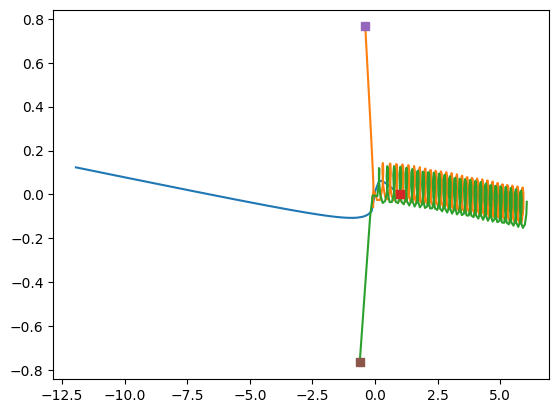

In [47]:
k = np.random.randint(idx.shape[0])
print(k)
pltidx = range(idx[k] , 257+idx[k])
pltsquare = idx[k]
plt.plot(trainSet.x_1[pltidx], trainSet.y_1[pltidx])
plt.plot(trainSet.x_2[pltidx], trainSet.y_2[pltidx])
plt.plot(trainSet.x_3[pltidx], trainSet.y_3[pltidx])

plt.plot(trainSet.x_1[pltsquare], trainSet.y_1[pltsquare], 's')
plt.plot(trainSet.x_2[pltsquare], trainSet.y_2[pltsquare], 's')
plt.plot(trainSet.x_3[pltsquare], trainSet.y_3[pltsquare], 's')